In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
import tensorflow as tf  #pip install --ignore-installed --upgrade tensorflow "type this in anacoda prompt"
# if you get  error ModuleNotFoundError: No module named 'tensorflow'
print("TensorFlow version:", tf.__version__)
from tensorflow.keras import models,layers


TensorFlow version: 2.11.0


In [24]:
BATCH_SIZE=5
WIDTH=3081
HIGHT=897
CHANNELS=3
EPOCHS=50
directory ="C:\\Users\\Favas\\DSC-25\DSC-T\\Internship\\RiceLeafDisease\\.ipynb_checkpoints\\RiceLeaf"


In [25]:
# image loading
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    shuffle=True,
    image_size=(WIDTH,HIGHT),
    batch_size=BATCH_SIZE
    
)

#NotFoundError: Could not find directory RiceLeaf
# Here instead of putting directory name it copy the path in to a variable and put that variable name
#SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape
# I put double back slash for this


Found 119 files belonging to 3 classes.


In [26]:
class_name=dataset.class_names
class_name

['Bacterial leaf blight-20200814T055237Z-001',
 'Brown spot-20200814T055208Z-001',
 'Leaf smut-20200814T055530Z-001']

In [27]:
len(dataset)

24

In [28]:
for image_batch,label_batch in dataset.take(1):
    # print(image_batch[0]) # First image tensor
    #print(image_batch[0].numpy()) # using numpy
      print(image_batch[0].shape) # shape of the first image
#     print(image_batch.shape)  # shape of the batch
#     print(label_batch.numpy())

(3081, 897, 3)


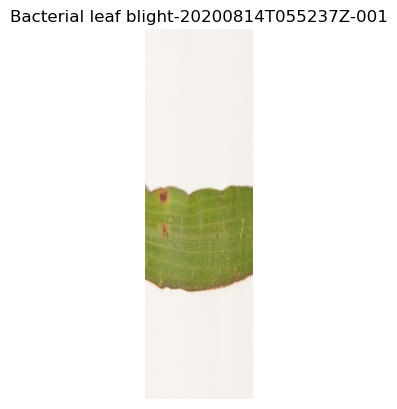

In [30]:
for image_batch,label_batch in dataset.take(1): # getting image
    plt.imshow(image_batch[1].numpy().astype("uint8")) # adding title name as class name
    plt.title(class_name[label_batch[3]])
    plt.axis('off')

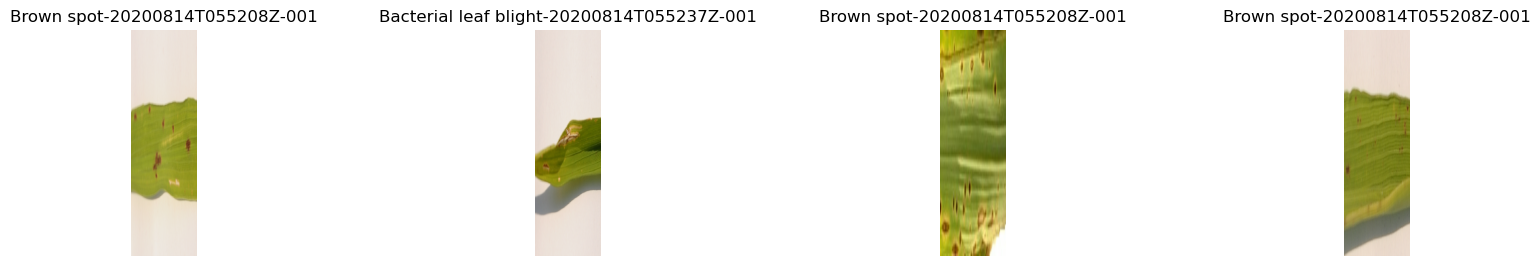

In [32]:
# To show 12 images
plt.figure(figsize=(20,10))
for image_batch,label_batch in dataset.take(1):
    for i in  range(4):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8")) 
        plt.title(class_name[label_batch[i]])
        plt.axis('off')

80% ==>training
20% ==>10% validation 10 % test

In [33]:
train_size=.80
len(dataset)*train_size

19.200000000000003

In [34]:
train_ds=dataset.take(6)

In [35]:
test_ds=dataset.skip(6)
len(test_ds)

18

In [36]:
val_size=0.1
len(dataset)*val_size

2.4000000000000004

In [37]:

len(val_ds)

0

In [38]:
def get_dataset_partition_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
        
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    
    train_ds=ds.take(train_size)
    
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    
    
    return train_ds,val_ds,test_ds

In [39]:
train_ds,val_ds,test_ds=get_dataset_partition_tf(dataset)

In [40]:
len(train_ds)


19

In [41]:
len(val_ds)

2

In [44]:
len(test_ds)

3

In [51]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
tes_ts=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [52]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(WIDTH,HIGHT),
    layers.experimental.preprocessing.Rescaling(1.0/255)
    
])

NameError: name 'IMAGE_SIZE' is not defined

In [48]:
tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])